[[  0   0   0   0   0   0]
 [  0 131 255 206 219   0]
 [  0 207 255 255 255   0]
 [  0 242 255 255 255   0]
 [  0 158 255 255 182   0]
 [  0   0   0   0   0   0]]


[]

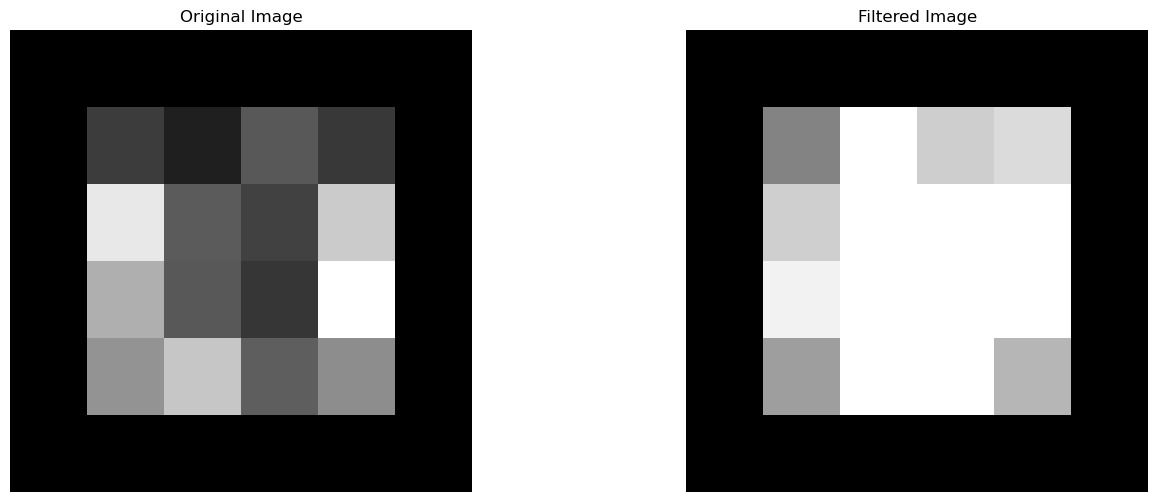

In [5]:
import cv2, numpy as np
import matplotlib.pyplot as plt

def customFilter(img, i, j, weights):
    s = 0
    for a in range(-1, 2):
        for b in range(-1, 2):
            s += int(img[i + a][j + b]) * weights[a + 1][b + 1]

    weightsum = sum(sum(row) for row in weights)
    result = s if weightsum != 0 else s
    return max(0, min(255, result))

weights = [
    [23/37, 12/37, 34/37],
    [89/37, 35/37, 25/37],
    [67/37, 34/37, 21/37],
]

img = np.array([
    [0,0,0,0,0,0],
    [0,23,12,34,22,0],
    [0,89,35,25,78,0],
    [0,67,34,21,98,0],
    [0,57,76,36,54,0],
    [0,0,0,0,0,0]
])

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows, cols = img.shape
dummy = img.copy()
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        dummy[i][j] = customFilter(img, i, j, weights)

print(dummy)

plt.subplot(1, 2, 2)
plt.imshow(dummy, cmap="grey")
plt.axis("off")
plt.title("Filtered Image")
plt.plot()

[[ 0  0  0  0  0  0]
 [ 0  0 23 22  0  0]
 [ 0 23 34 34 22  0]
 [ 0 35 36 36 25  0]
 [ 0  0 34 34  0  0]
 [ 0  0  0  0  0  0]]


[]

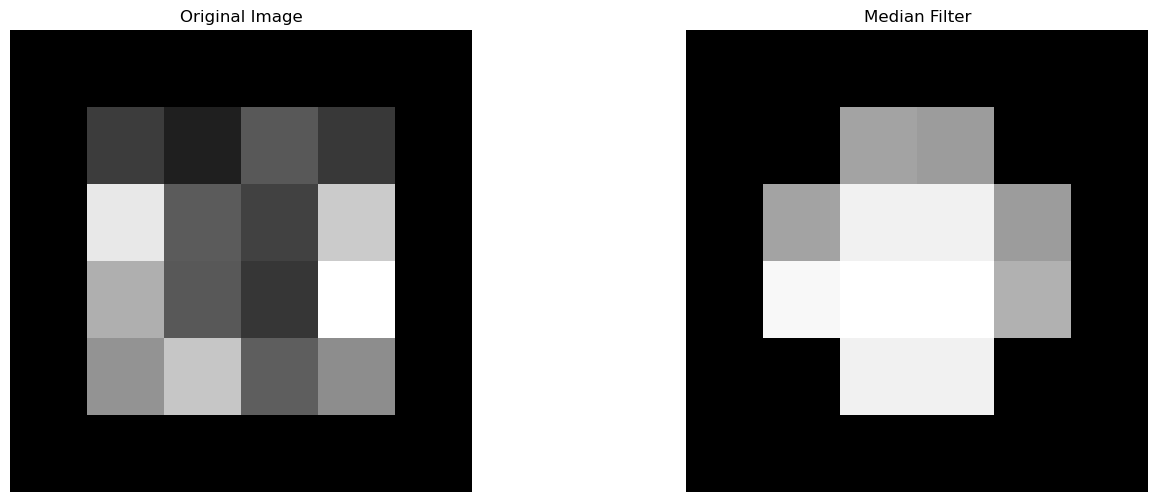

In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt
def medianFilter(img,i,j):
    neighbor = []
    for a in range(-1,2):
        for b in range(-1,2):
            neighbor.append(img[i+a][j+b])

    neighbor.sort()
    # print(neighbor)
    return neighbor[4] 
      
img = np.array([
    [0,0,0,0,0,0],
    [0,23,12,34,22,0],
    [0,89,35,25,78,0],
    [0,67,34,21,98,0],
    [0,57,76,36,54,0],
    [0,0,0,0,0,0]
])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
dummy = img.copy()
for i in range(1,rows-1):
    for j in range(1,cols-1):
        dummy[i][j] = medianFilter(img,i,j)

print(dummy)
plt.subplot(1,2,2)
plt.imshow(dummy,cmap="grey")
plt.axis("off")
plt.title("Median Filter")
plt.plot()

[[  0   0   0   0   0   0   0   0]
 [  0  59  90  91  92  95  64   0]
 [  0  91 142 149 155 159 107   0]
 [  0 107 167 176 183 185 124   0]
 [  0 112 175 183 188 185 122   0]
 [  0  80 123 124 125 121  79   0]
 [  0   0   0   0   0   0   0   0]]


[]

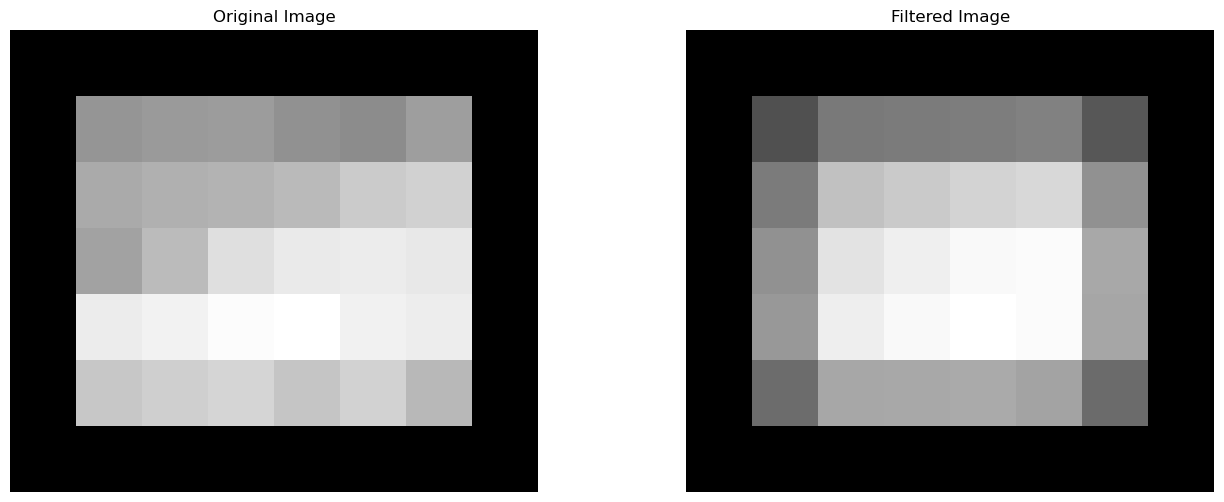

In [8]:
import cv2, numpy as np
import matplotlib.pyplot as plt

def customFilter(img, i, j, weights):
    s = 0
    for a in range(-1, 2):
        for b in range(-1, 2):
            s += int(img[i + a][j + b]) * weights[a + 1][b + 1]

    weightsum = sum(sum(row) for row in weights)
    result = s/weightsum if weightsum != 0 else s
    return max(0, min(255, result))

weights = [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
]

img = np.array([
    [0,0,0,0,0,0,0,0],
    [0,123,127,128,119,115,130,0],
    [0,140,145,148,153,167,172,0],
    [0,133,154,183,192,194,191,0],
    [0,194,199,207,210,198,195,0],
    [0,164,170,175,162,173,151,0],
    [0,0,0,0,0,0,0,0],
])

# print(img)
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows, cols = img.shape
dummy = img.copy()
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        dummy[i][j] = customFilter(img, i, j, weights)

print(dummy)

plt.subplot(1, 2, 2)
plt.imshow(dummy, cmap="grey")
plt.axis("off")
plt.title("Filtered Image")
plt.plot()

# Labwork 2

## Part 1: Use OpenCV and Python to do the following tasks

**Task 1**: Load an image, then display it and its histogram on the screen.

**Task 2**: Apply the averaging filter using the function: cv2.blur(), Gaussian filter
using the function cv2.GaussianBlur() and Median filter using the function cv2.medianBlur() on the loaded image to blur it. Display the filtered images and
compare the difference with the original image.

**Task 3**: Add Gaussian noise, Salt and Pepper noise and Periodic noise to the
loaded image, then display the noisy images with their corresponding histogram.

**Task 4**: Apply the averaging filter, Gaussian filter, and Median filter to the three
noisy images to remove noise. Display the noisy images and the noise removal
images to see the difference.

**Task 5**: Transform the periodic noisy image from spatial domain to frequency
domain using Fourier transform, then: (1) Perform noise removal on the
transformed image using frequency filtering, (2) Perform Inverse Fourier
Transform to convert the image from frequency domain back to spatial domain,
finally (3) Display the periodic noisy image and the filtered image together for
comparison.



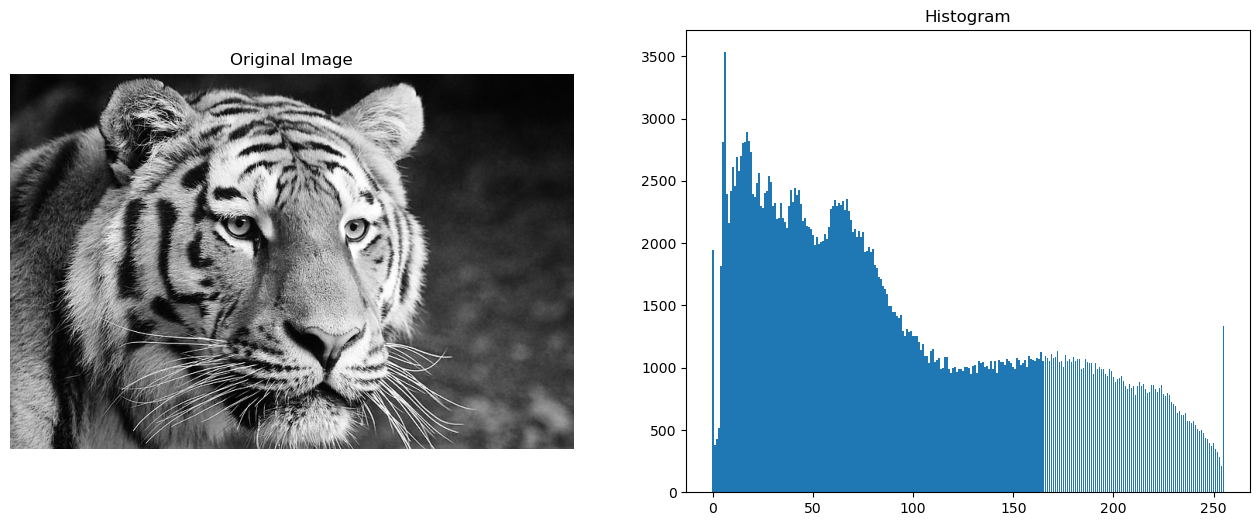

In [46]:
# Task 1
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title("Original Image")
plt.axis('off')

histogram = [0] * 256
for row in image:
    for pixel in row:
        histogram[pixel] += 1

plt.subplot(1,2,2)
plt.bar(range(256),histogram)
plt.title("Histogram")
plt.show()


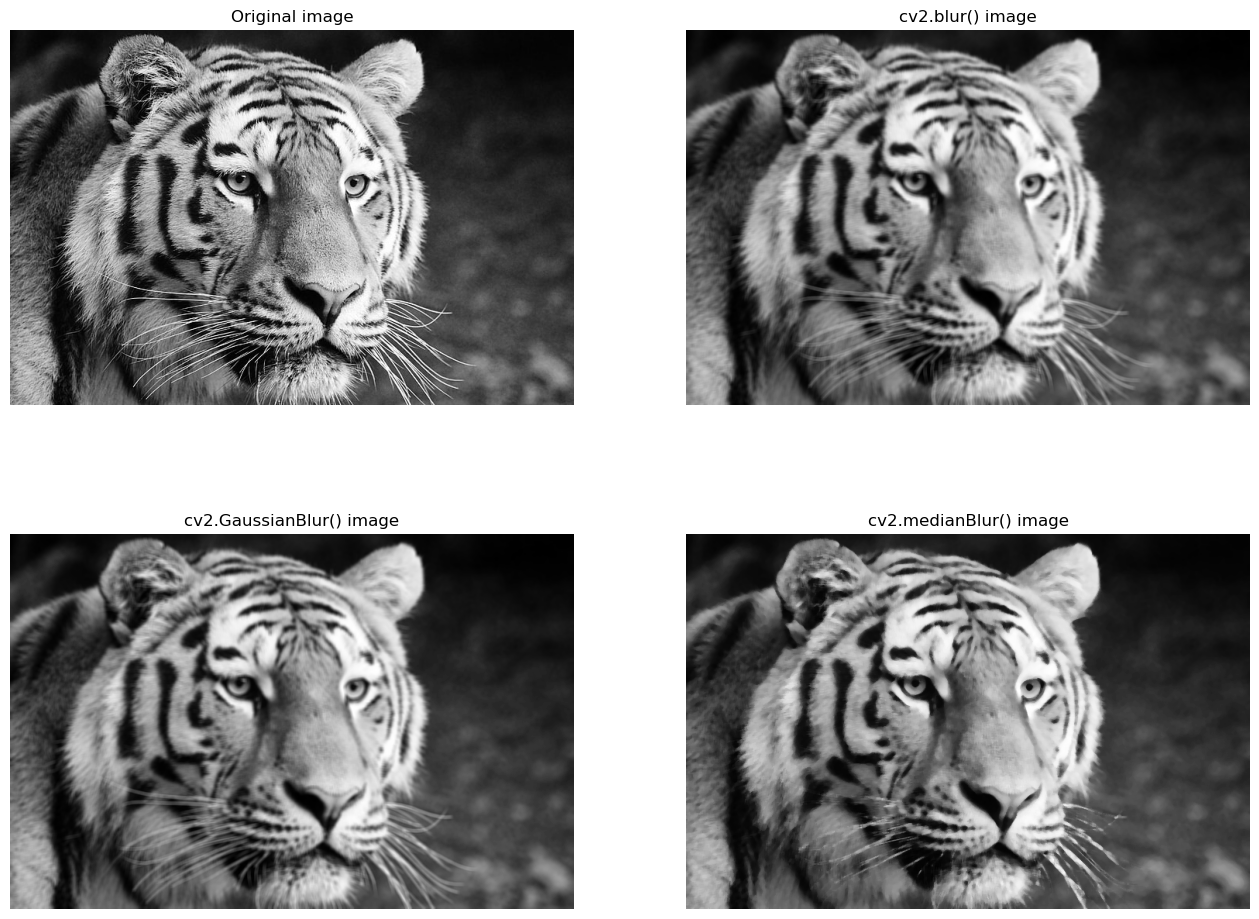

In [47]:
#Task 2
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.axis('off')

blurred_image = cv2.blur(image, (5, 5))
plt.subplot(2,2,2)
plt.imshow(blurred_image, cmap='gray')
plt.title('cv2.blur() image')
plt.axis('off')

guassian_blurred_image = cv2.GaussianBlur(image, (5, 5), 3)
plt.subplot(2, 2, 3)
plt.imshow(guassian_blurred_image, cmap='gray')
plt.title('cv2.GaussianBlur() image')
plt.axis('off')

median_blurred_image = cv2.medianBlur(image, 5)
plt.subplot(2, 2, 4)
plt.imshow(median_blurred_image, cmap='gray')
plt.title('cv2.medianBlur() image')
plt.axis('off')

plt.show()

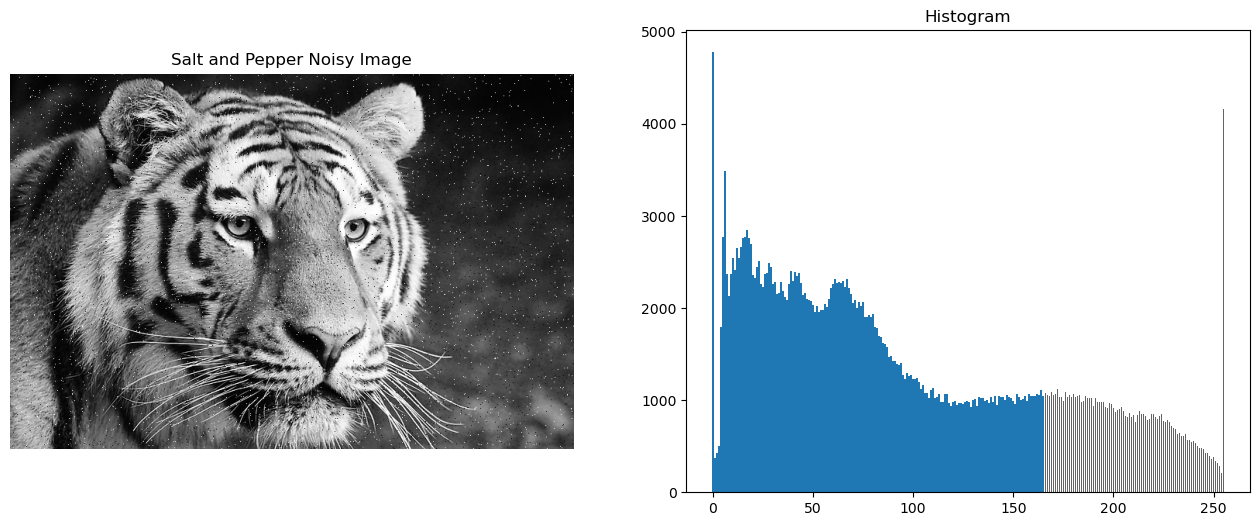

In [48]:
#Task 3
import random

def plot_and_histogram(image,title):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.title(title)
    plt.axis('off')

    histogram = [0] * 256
    for row in image:
        for pixel in row:
            histogram[pixel] += 1

    plt.subplot(1,2,2)
    plt.bar(range(256),histogram)
    plt.title("Histogram")
    plt.show()

def add_salt_pepper(image, number_of_noises=5000):
    noisy_image = image.copy()
    row, col = noisy_image.shape

    # Add white noise - Salt
    for _ in range(number_of_noises):
        i = random.randint(0, row - 1)
        j = random.randint(0, col - 1)
        noisy_image[i][j] = 255

    # Add black noise - Pepper
    for _ in range(number_of_noises):
        i = random.randint(0, row - 1)
        j = random.randint(0, col - 1)
        noisy_image[i][j] = 0

    return noisy_image

image = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)
salt_pepper_image = add_salt_pepper(image,random.randint(1000,7000))

plot_and_histogram(salt_pepper_image,"Salt and Pepper Noisy Image")

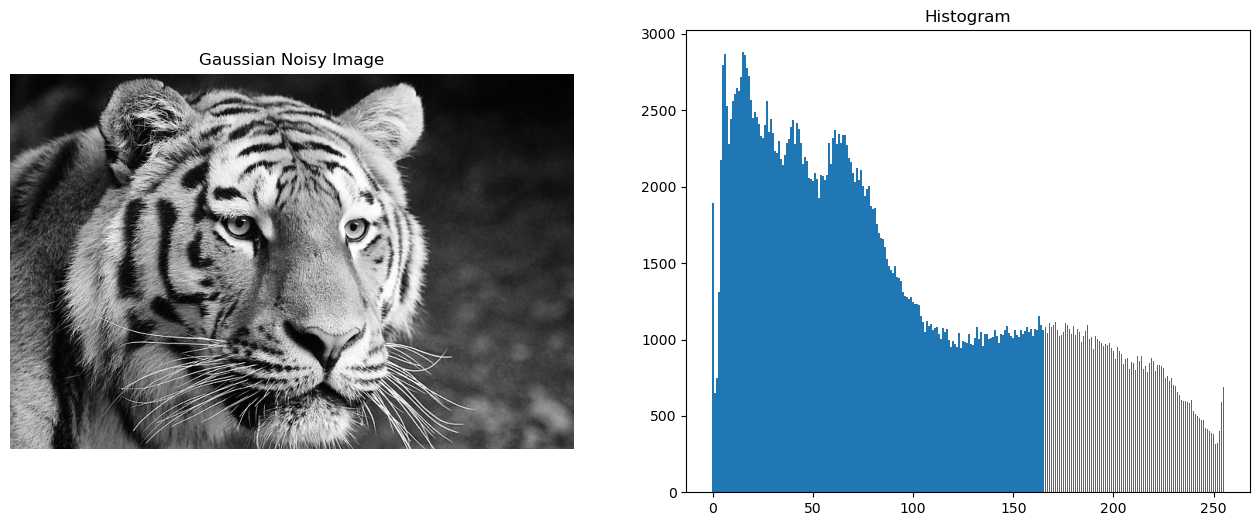

In [50]:
# Task 3: Gaussian noise
import random

def add_gaussian_noise(image,mean=0,std=1):
    noisy_image = image.copy()
    row,col = image.shape

    for i in range(row):
        for j in range(col):
            noise = random.gauss(mean,std)
            new_pixel = image[i][j] + noise
            new_pixel = max(0,min(255,new_pixel)) # Clip to [0,255]
            noisy_image[i][j] = new_pixel

    return noisy_image

        
gaussian_noisy = add_gaussian_noise(image)
plot_and_histogram(gaussian_noisy,"Gaussian Noisy Image")